### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [84]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [85]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [86]:
# матрица признаков
X.shape 

(1000, 2)

In [87]:
# реализуем функцию, определяющую среднеквадратичную ошибку (метрика качества)
def mserror(X, w, y_pred):
    y = X.dot(w) # вектор прогнозов
    return (sum((y - y_pred)**2)) / len(y)

In [88]:
def gradient_descent(X,
                     y, 
                     mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                             # чтобы он не стемился к нулю
                    ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_GD = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0])
        errors_GD.append(mserror(X, new_w, y))
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_GD[-1] - errors_GD[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_GD

errors_GD = gradient_descent(X, y)
    
print(f'Функционал ошибки GD:{errors_GD[-1]}')

Функционал ошибки GD:26.437631189903797


In [89]:
def stohastic(X,
              y, 
              mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                      # чтобы он не стемился к нулю
              ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_SGD = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) /
                                         y.shape[0])

        errors_SGD.append(mserror(X, new_w, y))
        
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_SGD[-1] - errors_SGD[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_SGD

errors_SGD = stohastic(X, y)
    
print(f'Функционал ошибки SGD: {errors_SGD[-1]}')

Функционал ошибки SGD: 27.31096270901946


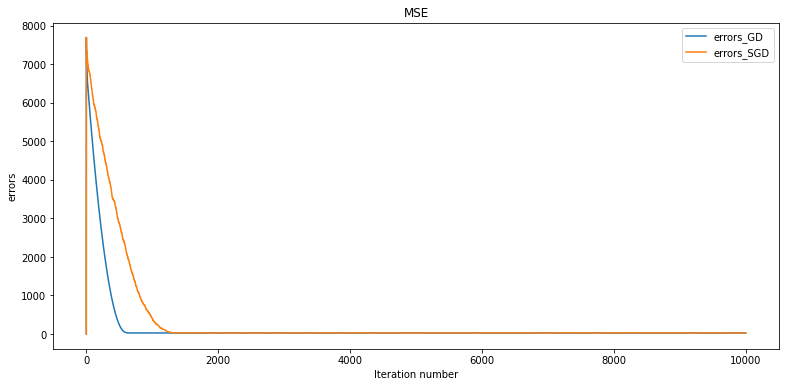

In [90]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors_GD)), errors_GD, label=r'errors_GD')
plt.plot(range(len(errors_SGD)), errors_SGD, label=r'errors_SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('errors')
plt.legend(loc="best")

### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [91]:
def mserrorL2(X, w, y_pred, alpha = 0.01):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y)) + (alpha * np.sum(np.square(w)))

In [92]:
def gradient_descent_L2(X,
                     y, 
                     mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                             # чтобы он не стемился к нулю
                    ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_GD_L2 = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0] + 2 * alpha * np.sum(w))
        errors_GD_L2.append(mserrorL2(X, new_w, y))
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_GD_L2[-1] - errors_GD_L2[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_GD_L2

errors_GD_L2 = gradient_descent_L2(X, y)
    
print(f'Функционал ошибки GD:{errors_GD_L2[-1]}')

Функционал ошибки GD:329.1420824198673


In [102]:

def stohastic_L2(X,
              y, 
              mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                      # чтобы он не стемился к нулю
              ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_SGD_L2 = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X[train_ind].T, (np.dot(X[train_ind], w)/
                                                  - y[train_ind])) / y.shape[0]  + 2 * alpha * np.sum(w))

        errors_SGD_L2.append(mserror(X, new_w, y))
        
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_SGD_L2[-1] - errors_SGD_L2[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_SGD_L2

errors_SGD_L2 = stohastic_L2(X, y)
    
print(f'Функционал ошибки SGD: {errors_SGD_L2[-1]}')

Функционал ошибки SGD: 8190.716187703663


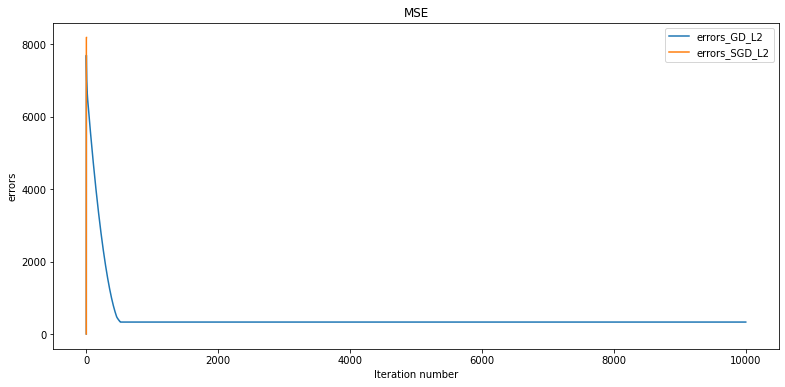

In [97]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors_GD_L2)), errors_GD_L2, label=r'errors_GD_L2')
plt.plot(range(len(errors_SGD_L2)), errors_SGD_L2, label=r'errors_SGD_L2')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('errors')
plt.legend(loc="best")